# Assessing the difference in health insurance charges between smokers and non smokers in the United States

## Introduction

With only about 8.3% of the population not being insured at any point in the past year, health insurance has a widespread impact on the American population (Keisler-Starkey & Bunch, 2022). Many companies will also take insurance premiums out of employees' pay, so it is important for employees to know the actions they can take to reduce these premiums (Fontinelle, 2022). For this reason, we decided to explore if people who smoke are charged more for health insurance than non-smokers in the United States, as this is one variable that is controllable by the individual. Our population of interest is people in the United States with health insurance policies. To answer our inferential question, we will calculate the difference in the means between the insurance charges of smokers versus non-smokers as our point estimate, with our null hypothesis stating that there is no difference between the insurance charges. Our data has been collected from the US Health Insurance Dataset and contains 1338 rows of data which is described below.

## Preliminary Results

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(digest)
library(cowplot)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# read in dataset
insurance <- read_csv("https://raw.githubusercontent.com/Yuji03b/STAT-201-GROUP-1/main/insurance.csv")

# view first few rows
head(insurance)

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,bmi,children,smoker,region,charges
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


The columns in the dataset are:
1. `Age`: Age of beneficiary

2. `Sex`: Insurance contractor gender, female/male

3. `bmi`: Body mass index

4. `children`: Number of children covered by health insurance

5. `smoker`: Whether beneficiary is a smoker or not

6. `region`: The beneficiary's residential area in the US

7. `charges`: Individual medical costs billed by health insurance

In [3]:
# describe columns of interest
summary(insurance |> select(smoker, charges))

    smoker             charges     
 Length:1338        Min.   : 1122  
 Class :character   1st Qu.: 4740  
 Mode  :character   Median : 9382  
                    Mean   :13270  
                    3rd Qu.:16640  
                    Max.   :63770  

Looking at the dataset, we need to make sure that there is an even number of female and male represented in both smoking and non smoking groups, as well as age and number of dependents to ensure these variables do not impact our study of the smoker variable.

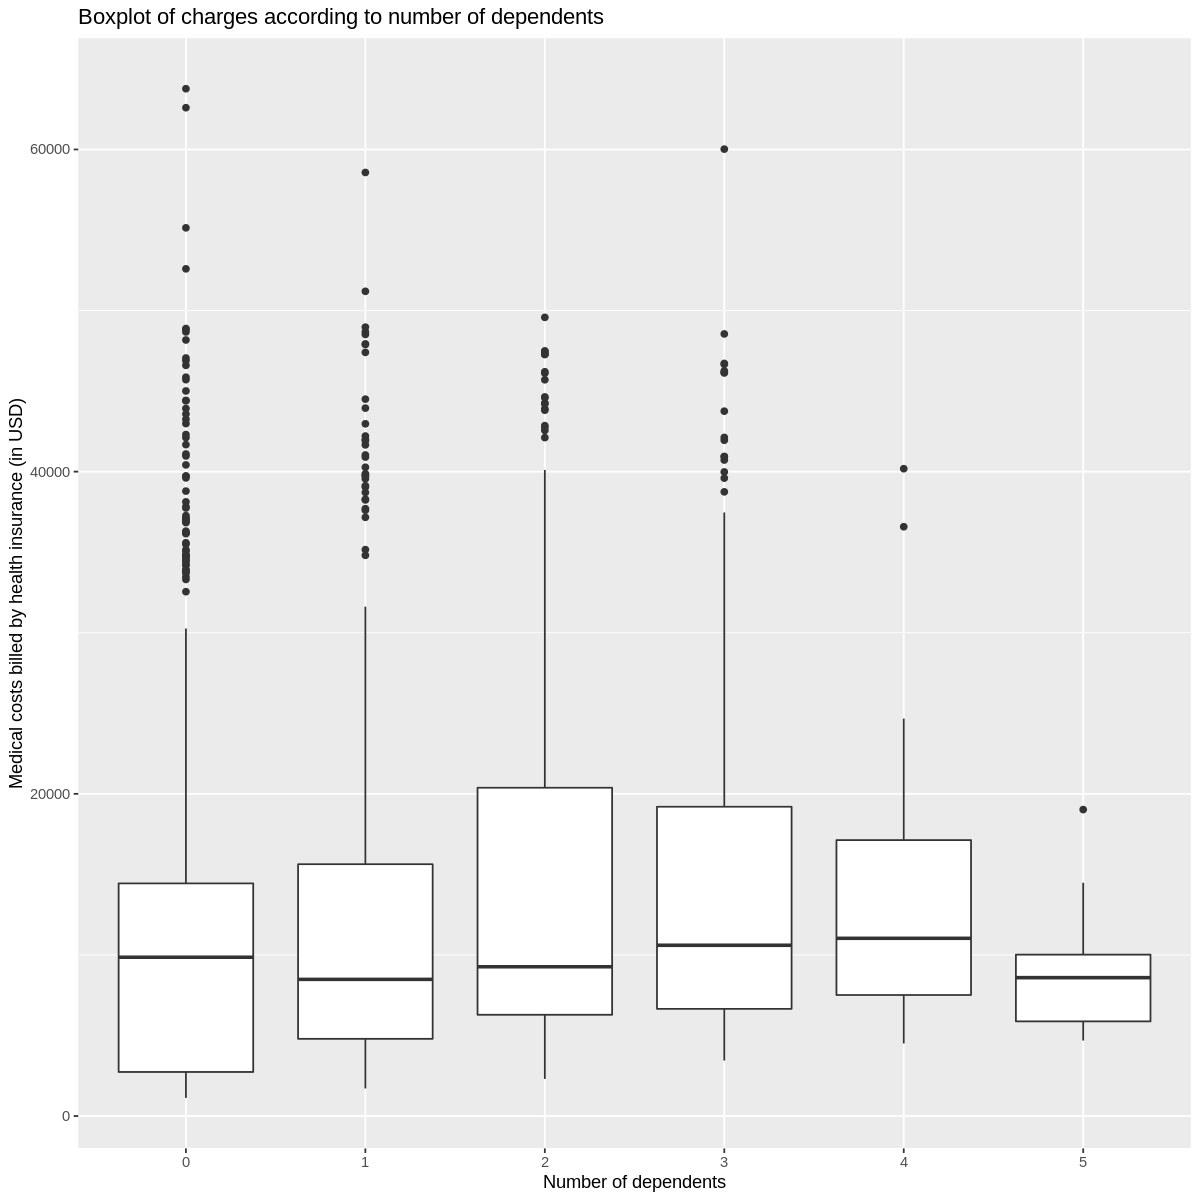

In [4]:
options(repr.plot.width = 10, repr.plot.height = 10)

# boxplot showing the distribution of medical costs billed based on number of dependents
plot1 <- ggplot(insurance, aes(x=as.factor(children), y=charges)) +
    geom_boxplot() +
    ggtitle("Boxplot of charges according to number of dependents") +
    xlab("Number of dependents") +
    ylab("Medical costs billed by health insurance (in USD)")

plot1

*Figure 1: Boxplot of Charges Based on Number of Dependents*

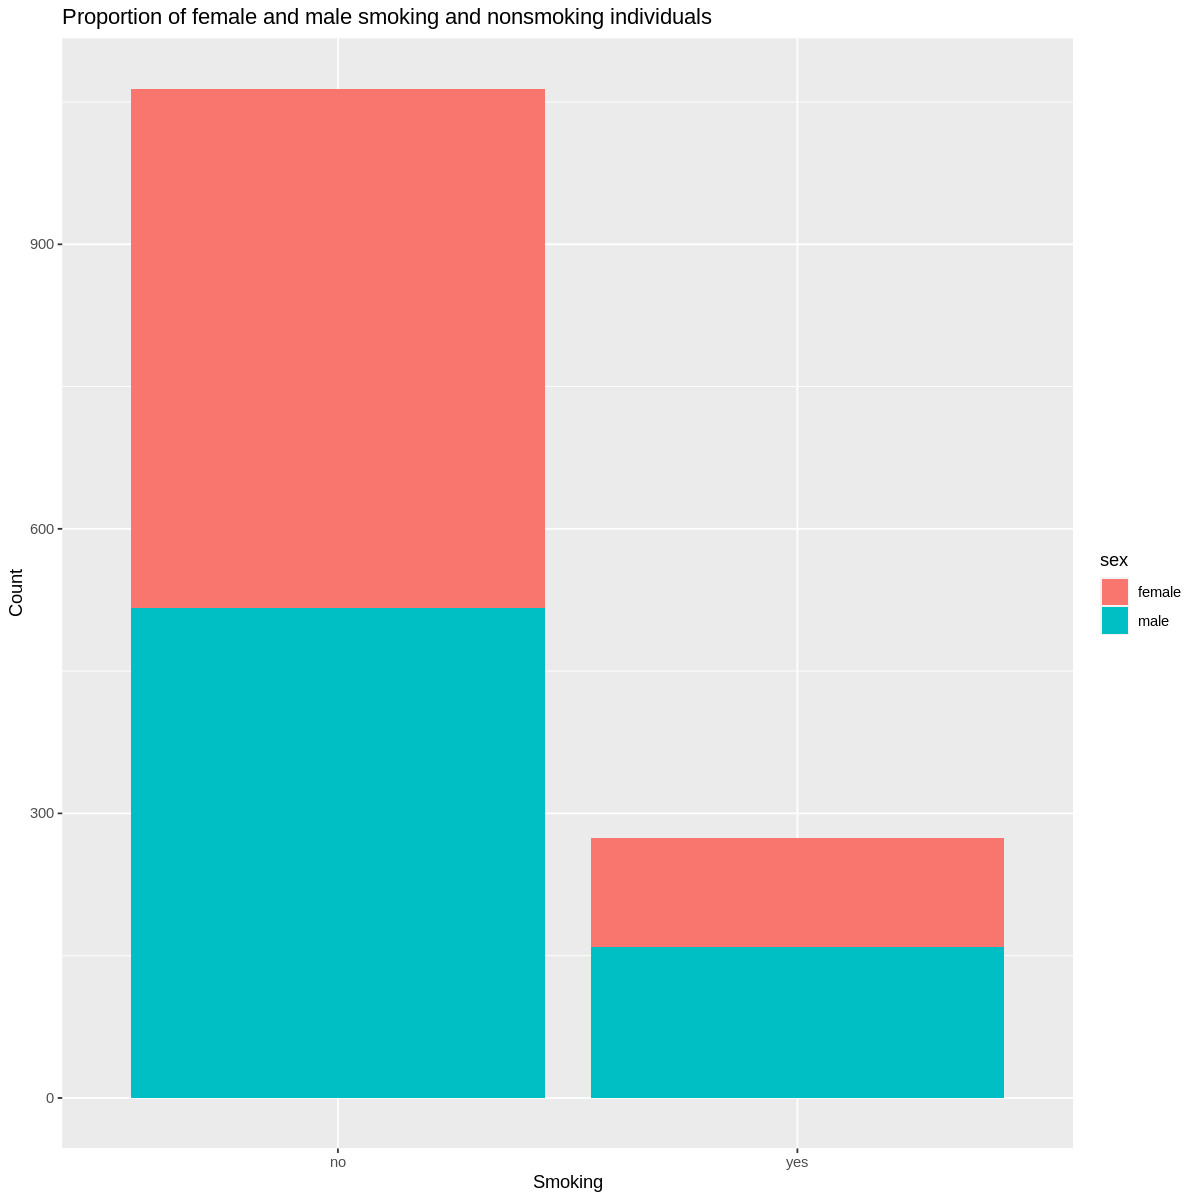

In [5]:
# visualizing how many males and females are smokers vs non smokers
plot2 <- insurance %>%
    ggplot() +
    geom_bar(aes(x=as.factor(smoker), fill = sex)) +
    ggtitle("Proportion of female and male smoking and nonsmoking individuals") +
    xlab("Smoking") +
    ylab("Count")

plot2

*Figure 2: Bar Graph for the Gender Proportion in Smokers and Non-smokers*

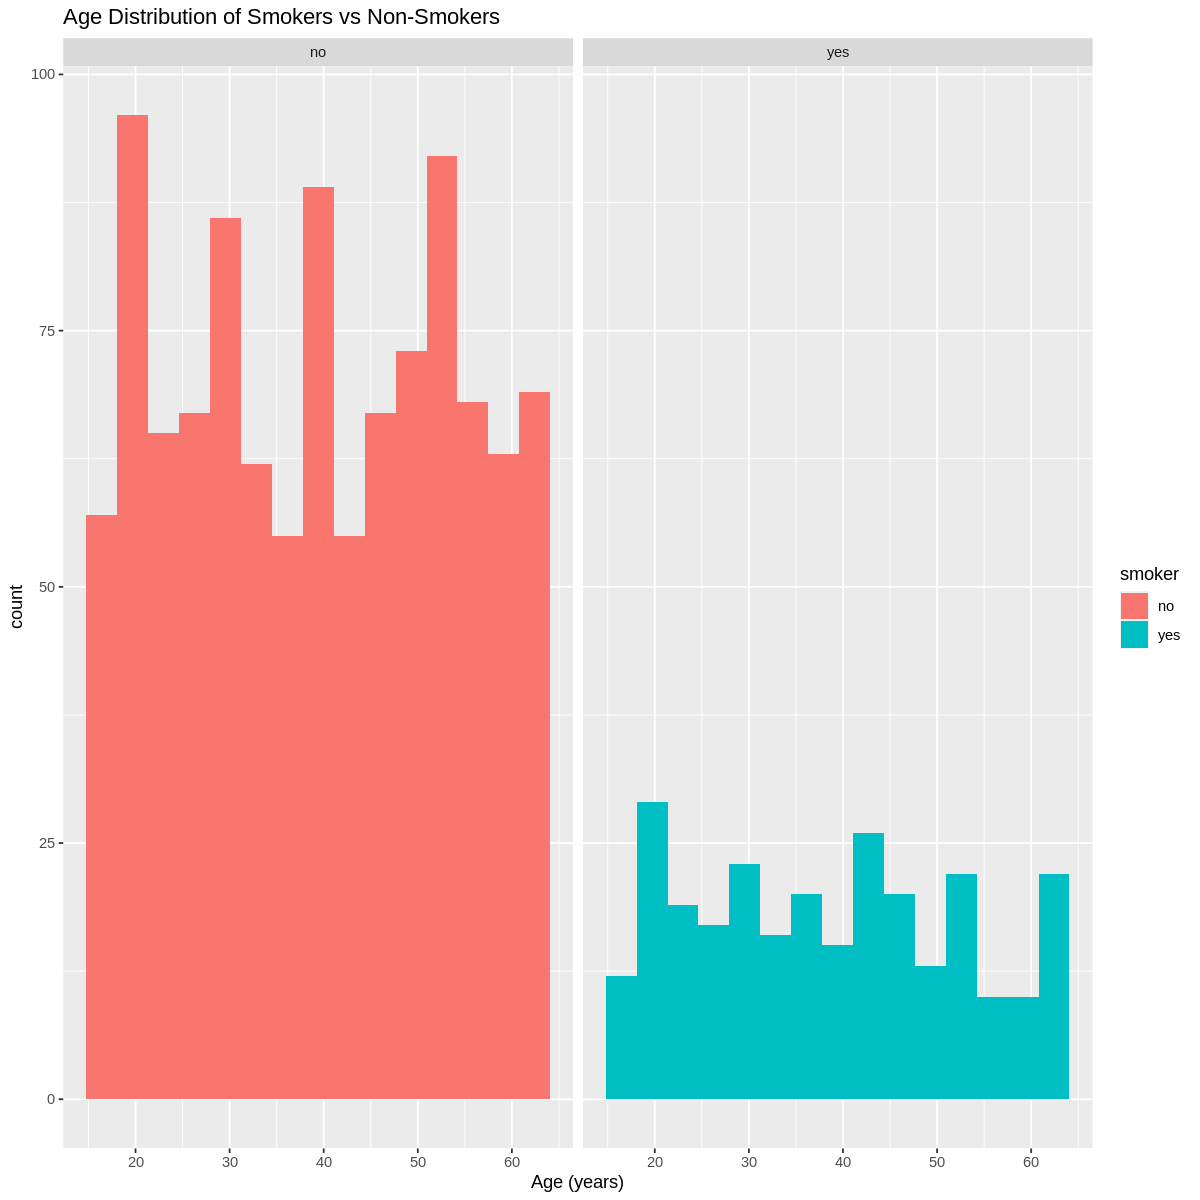

In [6]:
# visualizing the age distribution between smokers and non-smokers
smoker_age_plot <- insurance %>%
    ggplot(aes(x = age, fill = smoker)) +
    geom_histogram(bins = 15) +
    facet_grid(.~ factor(smoker)) +
    ggtitle("Age Distribution of Smokers vs Non-Smokers") +
    xlab("Age (years)") 

smoker_age_plot

*Figure 3: Distribution of Age Between Smokers and Non-Smokers*

In figure 1, we can see that the spread of the number of dependents is similar and their means are close together. In figure 2, we see that there is an equal amount of male and female in both the smokers and non-smokers group. In figure 3, we can see that age is roughly uniformly distributed in both groups as well. Hence, the variables gender, age, and number of dependents look well represented in both the smokers and non-smokers group.

In [7]:
# calculating mean and standard deviation of medical charges for smokers vs non-smokers
insurance_estimates <- insurance %>%
    group_by(smoker) %>%
    summarize(mean = mean(charges), sd = sd(charges)) 

insurance_estimates

smoker,mean,sd
<chr>,<dbl>,<dbl>
no,8434.268,5993.782
yes,32050.232,11541.547


*Figure 4: Sample Mean and Standard Deviation of Smokers and Non-Smokers* 

We can see in Figure 4 that the mean charges for non-smokers is about $\$$8434 and the mean charges for smokers is $\$$32050, with the standard deviations being $\$$5994 and $\$$11542 respectively. Assesing these initial values, the mean insurance charges of smokers are higher than those of non-smokers, although the standard deviation is much higher so it is possible the real difference in charges is much closer.

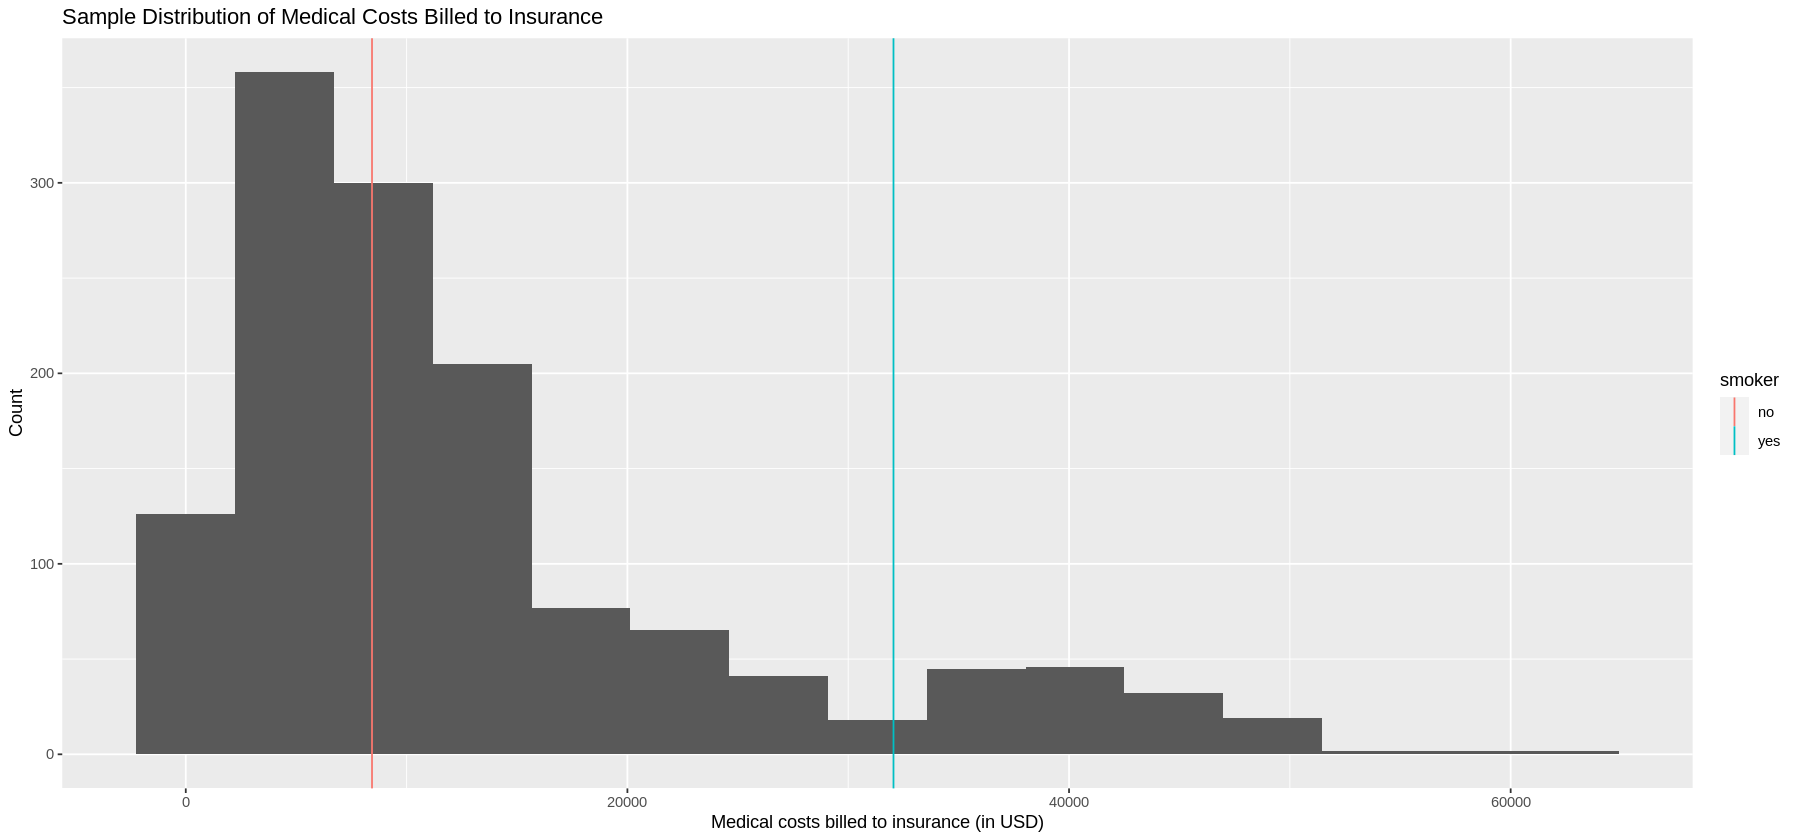

In [8]:
options(repr.plot.width=15, repr.plot.height=7) 

# visualizing the sample distribution of medical costs billed to insurance
plot5 <- insurance %>%
    ggplot(aes(x = charges)) +
    geom_histogram(bins = 15) +
    ggtitle("Sample Distribution of Medical Costs Billed to Insurance") +
    xlab("Medical costs billed to insurance (in USD)") +
    ylab("Count") + 
    geom_vline(data = insurance_estimates, aes(xintercept = mean, color = smoker)) 

plot5

*Figure 5: Sample Distribution of Charges With Vertical Lines Indicating the Mean of Each Group*

In [9]:
# select smoker and charges columns from our dataset
insurance <- insurance %>%
    select(smoker, charges) %>%
    filter(!is.na(charges))

#view filtered dataset
head(insurance)

smoker,charges
<chr>,<dbl>
yes,16884.924
no,1725.552
no,4449.462
no,21984.471
no,3866.855
no,3756.622


### Methods Plan
To answer our initial question of "Do smokers get charged more for their health insurance than non-smokers?", we will conduct a hypothesis test using the difference in means between yearly insurance charges of smokers versus non-smokers in the United States as our point estimates. We will set the same seed whenever we use randomization to ensure our code is reproducible. $H_0$ is our null hypothesis and $H_1$ is our experimental hypothesis.

$$H_0: \mu_{\text{smokers}} - \mu_{\text{non-smokers}}=0$$

$$H_1:\mu_{\text{smokers}} - \mu_{\text{non-smokers}}>0$$


Since the smoker and non-smoker groups are independent and the distribution is not normal, we have to chosen to use the following two-sample t-test:


$$
T = \frac{\bar{x}_{\text{smokers}} - \bar{x}_{\text{non-smokers}}}{\sqrt{\frac{s^2_{\text{smokers}}}{n_1}+\frac{s^2_{\text{non-smokers}}}{n_2}}}
$$

We will also use the permutation method to generate the null distribution to determine how unlikely it is to observe a statistic as extreme as the null hypothesis. 

Then, we will calculate the p-value from both methods, which represents the probability of how unusual the data results are if $H_0: \mu_{\text{smokers}} - \mu_{\text{non-smokers}}=0$ is true. We will assign a 5% significance level and compare our p-value against it to determine whether or not we should reject $H_0$.

We will then calculate the 95% confidence interval for our test statistic to get a better sense and understanding of the spread of the data.

Through this analysis, We expect to find that the people who smoke are charged more for health insurance than those who do not smoke, which means that we expect to reject $H_0$. This could inform the general population that one can lower their insurance costs based on whether they smoke or not. This study could also lead to further questions, specifically regarding if this result could potentially be applicable to other countries with different insurance laws and general smoking habits/levels.

While our expected result is to see a correlation between insurance costs and smoking habits, there are many other factors that could potentially impact these insurance costs. As a result, we must be cautious as to report a direct relationship when many other factors could also influence insurance charges, and our relatively small sample size could lead us to report a relationship that only exists for a small part of the population.

## Analysis


 ### Resampling method

 #### 1. obtain the observed test statistic

In [10]:
# finding the observed test statistic
obs_stat <- insurance %>%
    specify(formula = charges ~ smoker) %>%
    calculate(stat="diff in means",order=c("yes","no")) %>%
    pull()

cat("The observed test statistic is",  obs_stat)

The observed test statistic is 23615.96

 #### 2. Use resampling method to simulate the null distribution

We generate a null distribution to obtain the probability of getting our test statistic under the assumption that the null hypothesis is true. We generate 1000 reps because the sample is very large and this operation becomes very slow if we use many more.

In [11]:
set.seed(12345)

# creating a null distribution through the resampling method
insurance_null <- insurance %>%
    specify(formula = charges ~ smoker)%>%
    hypothesize(null="independence")%>%
    generate(reps=1000, type = "permute")%>%
    calculate(stat="diff in means",order=c("yes","no"))

head(insurance_null)

replicate,stat
<int>,<dbl>
1,-598.7382
2,347.7493
3,770.4276
4,-982.4877
5,-1257.8037
6,-484.6876


 #### 3. visualize the null distribution and p value

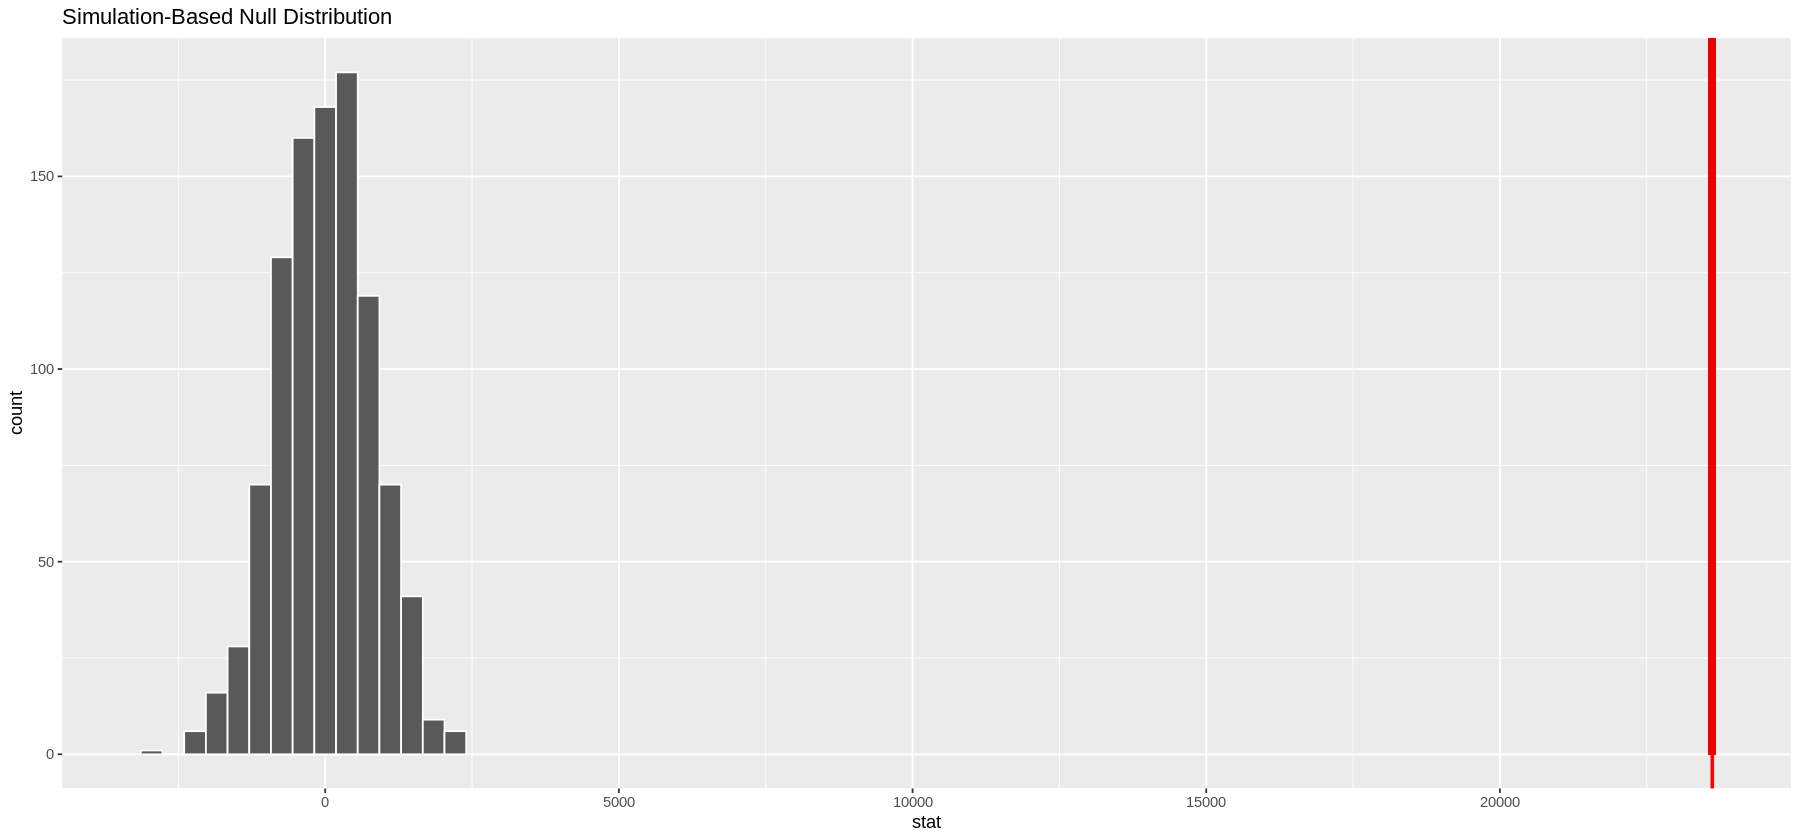

In [12]:
# visualizing the null ditribution and p-value
null_distribution_plot <- insurance_null %>%
    visualize() +
    geom_vline(xintercept = obs_stat, col = "red", size = 1) +
    shade_p_value(obs_stat = obs_stat, direction = "right")

null_distribution_plot

*Figure 6: Null Distribution of Charges with a vertical line for the observed test statistic shown in red*

#### 4. get the p-value

In [13]:
# obtaining the p-value
p_value <- insurance_null %>%
 get_p_value(obs_stat = obs_stat, direction = "right")

p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


Our p-value is 0. In other words, the probability of us producing a sample with a statistic that is equal to the null hypothesis is practically 0%. However, it should be noted that it is not actually exactly 0 but it is reported as such due to the `get_p_value` function giving an approximation based on the number of reps we chose in the `generate()` step. The true p-value is a small value likely less than 0.001. 

### Asymptotic Method

Next we conduct a t test to calculate the p-value using asymptotics. We do this because the size of the sample n is sufficiently large to use the t test statistic, and we do not have access to the populations standard deviation to use the z statistic. The default confidence level of the test is 0.95. 

In [14]:
# finding the p value through the asymptotic method
asymptotic <- 
    broom::tidy(
        t.test(x = filter(insurance, smoker == "yes")$charges,
               y = filter(insurance, smoker == "no")$charges,
               alternative = "greater"))
asymptotic

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
23615.96,32050.23,8434.268,32.75189,2.944732e-103,311.8511,22426.4,Inf,Welch Two Sample t-test,greater


Our asymptotic method also gives us a very small p-value and is consistent with our resampling method. Our asymptotic methods tells us that under our null model there is a probability of 2.944732e-103 to produce a sample with a statistic that is either equal or more exteme than our null hypothesis.

In [15]:
# finding the confidence intervals
mean_diff_in_charges_ci <- 
    tibble(
        lower_ci = asymptotic$conf.low,
        upper_ci = asymptotic$conf.high
        )

mean_diff_in_charges_ci

lower_ci,upper_ci
<dbl>,<dbl>
22426.4,Inf


When deciding whether the bootstrapping method or the asymptotics method is better, we took the following ideas into consideration. When doing asymptotics we need to make sure that our sample satisfies several assumptions whereas a resampling approach doesn't require any assumptions about the underlying distribution of our population. Furthermore, our sample must be representative of the population for both methods to be effective. However, we found from our preliminary data analysis that our data satisfies the assumptions necessary for asymptotics. Hence, for our particular problem, there should not be one method that is more appropriate than the other. However, due to the extremely small p-value observed, our asymptotics method is more appropriate and reliable because it returned a concrete value (a non-zero value). Although the resampling method returned a p-value of 0, this does not tell us much as it is impossible to tell which is the largest significance level for which the null hypothesis would be rejected.

## Discussion

From our hypothesis test, we found that our p-value is less than 0.001 (2.944732e-103 to be precise) which is much lower than our 5% significance level, thus, we have strong evidence to reject the null hypothesis. From our t-test, we found the 95% confidence interval of 22426.4 to infinity, telling us we are 95% confident the true difference in means is some number greater than 22426.4. The combination of a low p-value and this confidence interval makes us confident in our rejection of our null hypothesis. Looking at figure 6, we also observe our test statistic is very far from any value observed in the null distribution, meaning it is very unlikely that the null distribution and thus the null hypothesis are correct. In addition, because of our 5% significance level, the probability of us committing a type one error and wrongly rejecting the null hypothesis is only 5%. 

This suggests that the true mean of yearly health insurance charges of smokers is much higher than the true mean charges of non-smokers. This aligns with what we expected from our preliminary data analysis where we found that the sample mean charges of smokers are higher than the sample mean charges of non-smokers. This result suggests that smokers will be charged more for health insurance than non-smokers, a fact that is realistic because insurance companies are well aware of the higher likelihood of medical issues that smokers have when compared to non-smokers, meaning a likely larger amount of hospital visits, and in turn, hospital bills.

The impacts of these findings could be significant for individuals looking to lower their insurance costs. Seeing that people who smoke pay over $20,000 per year more than people who don't could motivate people to stay away from or quit smoking, allowing them to not only lead healthier lives, but to cut insurance costs in doing so.

Further studies could look into the relationship between smoking and other variables such as gender, income, occupation, etc., that were not explored in this analysis, to determine if there are any other factors with a greater impact on health insurance costs than smoking. Although we tried to ensure there was no co-dependence in our dataset, it is impossible to know for certain if this was the case without further research. 

## References

Datta, A. (2019) <i>US Health Insurance Dataset</i> [Data set]. Kaggle. https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

Keisler-Starkey, K., & Bunch, L.N. (2022, September 13). <i>Health Insurance Coverage in the United States: 2021</i>. United States Census Bureau.     
    https://www.census.gov/library/publications/2022/demo/p60-278.html#:~:text=Highlights,8.6%20percent%20or%2028.3%20million

Fontinelle, A. (2022, March 2). <i>How Much Does Health Insurance Cost?</i>. Investopedia. 
    https://www.investopedia.com/how-much-does-health-insurance-cost-4774184